# Tests

## 1. Iterations tests

Let's consider task of minimization for convex quadratic form on fixed square when there is global solution in this square.

<IPython.core.display.Javascript object>


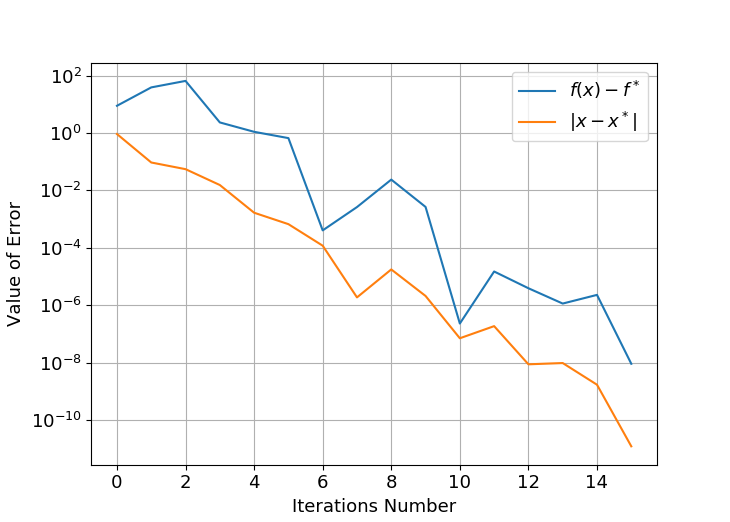

Theoretical Iteration Number through function constant 39.0
Theoretical Iteration Number through gradient constant 19.0


In [2]:
import sys
sys.path.append("./Experiments")
sys.path.append("./Tests_functions")
import comparison
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
res = comparison.qf_test(1e-8)

Now we consider task of minimization for convex quadratic form on fixed square when there is not global solution in this square.

<IPython.core.display.Javascript object>


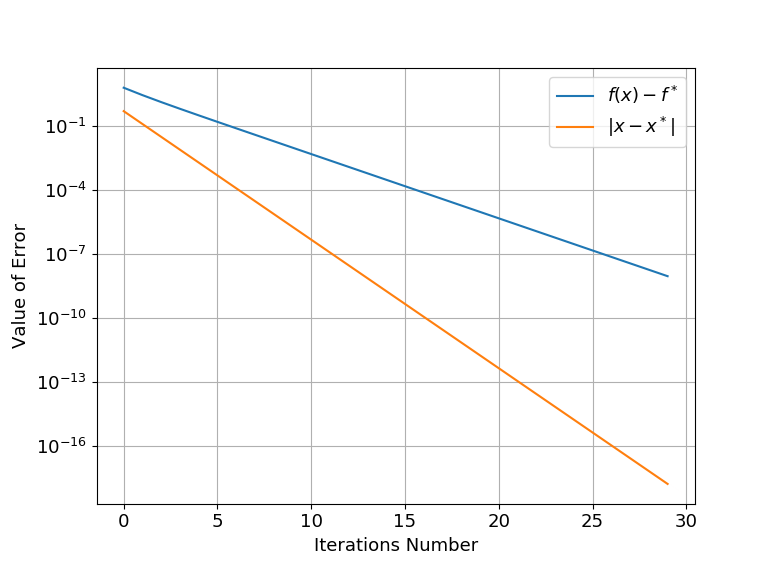

Theoretical Iteration Number through function constant 30.0
Theoretical Iteration Number through gradient constant 14.0


In [2]:
import sys
sys.path.append("./Experiments")
sys.path.append("./Tests_functions")
import comparison
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
res = comparison.qf_test_2(1e-8)

## 2. Estimates for accuracy of solution on segment

There are three strategies for to stop search of solution on segment. Below $\delta$ is a distance between current point-approximation and accurate solution.

* **The first strategy** - Little big
$$\delta \leq \frac{M_{der}}{L},$$

where $L$ is a Lipschitz constant for *gradient*, $M_{der}$ is a lower bound of derivative with the respect to $y$ for parallel to axis $Ox$ segment and derivative with the respect to $x$ for parallel to axis $Oy$ segment in point solution on segment. For this strategy an estimate is computed on each new segment. This strategy is workable (see theorem 4.1 in [Description of method](https://github.com/ASEDOS999/Optimization-Halving-The-Square/blob/master/One%20method.pdf))

* **The second strategy** - Constant estimate for all segments

$$\delta \leq \frac{\epsilon}{2La\sqrt{5}\log_2\frac{2Ma\sqrt{2}}{\epsilon}},$$

where $L$ and $M$ are Lipschitz constant for *gradient* and *function*, $a$ is a size of square, $\epsilon$ is a required accuracy of initial task's solution. This strategy requires to compute the estimate one time for the one start method. There is proof for this istimate in theorem 1 in [Article of Pasechnyuk and Stonyakin](https://arxiv.org/pdf/1812.10300.pdf).

* **The third strategy** - Comparison with gradient in current point

$$\delta \leq \frac{|f'(\textbf{x}_{cur})|}{L},$$

where $\textbf{x}_{cur}$ is current point-approximation, $L$ is a Lipschitz constant for *gradient*. The $f'(\textbf{x}_{cur})$ is a derivative with the respect to $x$ for parallel to axis $Oy$ segment and is a derivative with the respect to $y$ for parallel to axis $Ox$.

**Important remark**: in the halving square method we use golden search selection as method that solve one-dimensional task.

In [11]:
import sys
sys.path.append("./Experiments")
sys.path.append("./Tests_functions")
import matplotlib.pyplot as plt
import estimates
%matplotlib notebook

epsilon = [0.1**(i) for i in range(7)]
d = estimates.get_tests_estimates(epsilon)

eps =  1.0e+00
Mean time (True gradient) = 0.71ms
Mean time (Constant estimate) = 1.42ms
Mean time (Current gradient) = 0.74ms
eps =  1.0e-01
Mean time (True gradient) = 1.10ms
Mean time (Constant estimate) = 2.57ms
Mean time (Current gradient) = 1.16ms
eps =  1.0e-02
Mean time (True gradient) = 1.71ms
Mean time (Constant estimate) = 4.53ms
Mean time (Current gradient) = 1.84ms
eps =  1.0e-03
Mean time (True gradient) = 2.43ms
Mean time (Constant estimate) = 7.18ms
Mean time (Current gradient) = 2.63ms
eps =  1.0e-04
Mean time (True gradient) = 3.12ms
Mean time (Constant estimate) = 10.12ms
Mean time (Current gradient) = 3.36ms
eps =  1.0e-05
Mean time (True gradient) = 3.78ms
Mean time (Constant estimate) = 13.57ms
Mean time (Current gradient) = 4.12ms
eps =  1.0e-06
Mean time (True gradient) = 4.94ms
Mean time (Constant estimate) = 19.16ms
Mean time (Current gradient) = 5.37ms


<IPython.core.display.Javascript object>


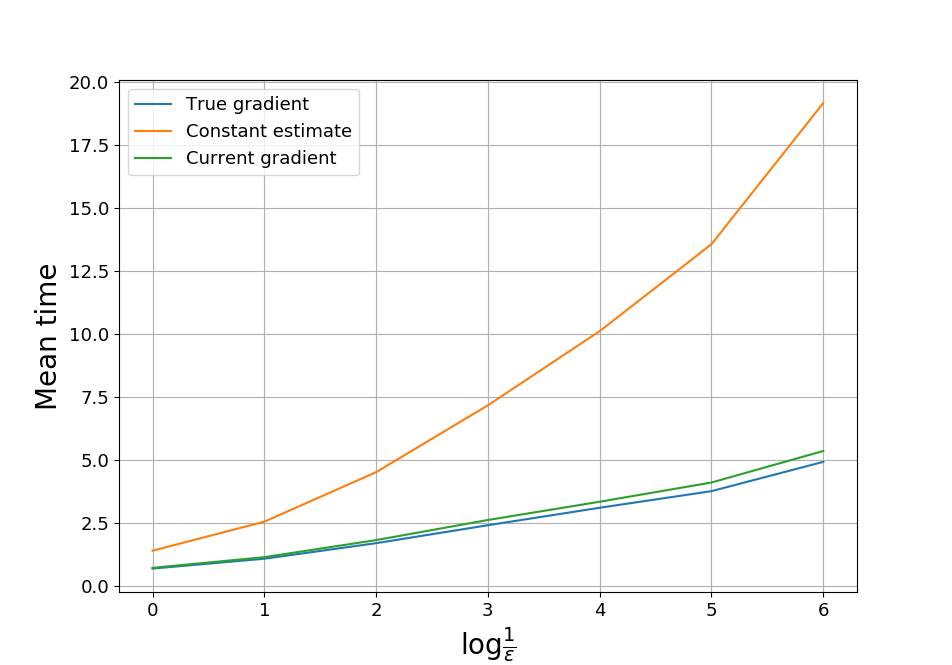

In [16]:
import matplotlib.pyplot as plt
%matplotlib notebook
cur = dict()
keys = list(d.keys())
keys.sort()
for i in keys:
    for j in d[i]:
        if cur.__contains__(j):
            cur[j].append(d[i][j])
        else:
            cur[j] = [d[i][j]]
k = cur.keys()
import numpy as np
keys = [-np.log(i)/np.log(10) for i in keys]
for j in k:
    plt.plot(keys, cur[j])
plt.grid()
n = 13
plt.xticks(fontsize = n)
plt.yticks(fontsize = n)
plt.legend(k, fontsize = n)
n = 20
plt.xlabel(r'$\log\frac{1}{\epsilon}$', fontsize = n)
plt.ylabel('Mean time', fontsize = n)
plt.savefig('1.pdf')

In [1]:
import sys
sys.path.append("./Experiments")
sys.path.append("./Tests_functions")
import matplotlib.pyplot as plt
import comparison
%matplotlib notebook
import time

N = 10
time_max = 100
s=time.time()
results, f = comparison.strategy_LogSumExp(N, time_max = time_max, eps = 1e-5)
results_copy1 = results, f
time.time()-s

R0 0.2189929347170073
L_f 756.6583710542733
CurGrad
ConstEst
<bound method halving_square.CurGrad of <method_functions.halving_square object at 0xaaa0f2ac>>
<bound method halving_square.ConstEst of <method_functions.halving_square object at 0xa8c4602c>>
<bound method halving_square.ConstEst of <method_functions.halving_square object at 0xa8c460ac>>
<bound method halving_square.ConstEst of <method_functions.halving_square object at 0xa8c4612c>>
<bound method halving_square.ConstEst of <method_functions.halving_square object at 0xa8c461ac>>
<bound method halving_square.ConstEst of <method_functions.halving_square object at 0xa8c4624c>>
<bound method halving_square.ConstEst of <method_functions.halving_square object at 0xa8c4634c>>
<bound method halving_square.ConstEst of <method_functions.halving_square object at 0xa8c4642c>>
<bound method halving_square.ConstEst of <method_functions.halving_square object at 0xa8c4650c>>
<bound method halving_square.ConstEst of <method_functions.halving_

19.26046633720398

In [2]:
results.keys()
results = {i: results[i][3][-1]-results[i][3][0] for i in results}
results

{'HalvingSquare-CurGrad': 2.119920253753662,
 1.0: 6.879649639129639,
 0.1: 9.324229001998901,
 0.010000000000000002: 11.711790800094604,
 0.0010000000000000002: 13.192879438400269,
 0.00010000000000000002: 14.657142877578735,
 1.0000000000000003e-05: 15.977511405944824,
 1.0000000000000004e-06: 17.171669483184814,
 1.0000000000000004e-07: 18.18428063392639,
 1.0000000000000005e-08: 18.73340129852295,
 1.0000000000000005e-09: 19.121264934539795}

## 3. Comparison for LogSumExp

###  N = 10, $\epsilon$ = 0.1

In [1]:
import sys
sys.path.append("./Experiments")
sys.path.append("./Tests_functions")
import matplotlib.pyplot as plt
import comparison
%matplotlib notebook
import time

N = 10
time_max = 30
s=time.time()
results, f = comparison.NEWcomparison_LogSumExp(N, time_max = time_max, eps = 0.1)
results_copy1 = results, f
time.time()-s

R0 0.2189929347170073
L_f 976.4568375131417
Ellipsoids
CurGrad
ConstEst
GD
<bound method halving_square.CurGrad of <method_functions.halving_square object at 0xa8c3122c>> None
<bound method halving_square.ConstEst of <method_functions.halving_square object at 0xa8c312ac>> 0.0006041181346288975


33.223981857299805

In [2]:
import matplotlib.pyplot as plt
%matplotlib notebook
keys = list(results.keys())
#keys = ["HalvingSquare-Const", 'Ellipsoids']
new_dict = dict()
for key in keys:
    print(key, len(results[key][3]))
    times = [i - results[key][3][0] for i in results[key][3]]
    f_value = [f.calculate_function(i[0], i[1])+10 for i in results[key][2]]
    new_dict[key] = (times, f_value)

HalvingSquare-CurGrad 108
HalvingSquare-ConstEst 120
Ellipsoids 8
GD 7


<IPython.core.display.Javascript object>


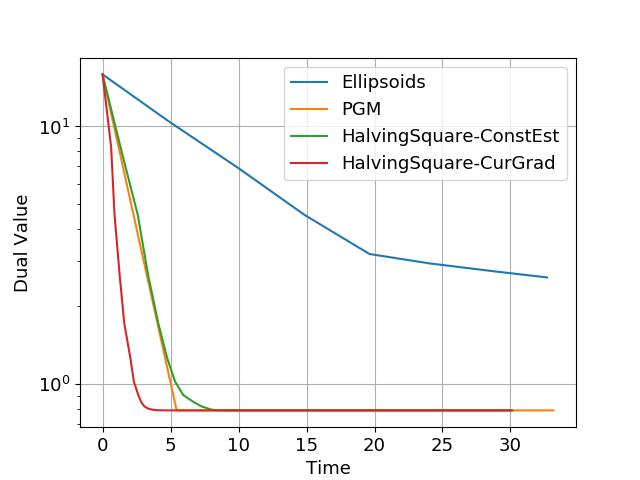

In [3]:
import matplotlib.pyplot as plt
%matplotlib notebook
keys.sort()
for i in keys:
    plt.semilogy(new_dict[i][0], new_dict[i][1])
keys[1] = 'PGM'
plt.grid()
n = 13
plt.xticks(fontsize = n)
plt.yticks(fontsize = n)
plt.legend(keys, fontsize = n)
n = 13
plt.ylabel('Dual Value', fontsize = n)
plt.xlabel('Time', fontsize = n)
plt.show()

###  N = 10, $\epsilon$ = 0.001

In [4]:
import sys
sys.path.append("./Experiments")
sys.path.append("./Tests_functions")
import matplotlib.pyplot as plt
import comparison
%matplotlib notebook
import time

N = 10
time_max = 30
s=time.time()
results, f = comparison.NEWcomparison_LogSumExp(N, time_max = time_max, eps = 0.001)
results_copy1 = results, f
time.time()-s

R0 0.2189929347170073
L_f 991.3572184215939
Ellipsoids
CurGrad
ConstEst
GD
<bound method halving_square.ConstEst of <method_functions.halving_square object at 0xa1754dec>> 1.0276055881500342e-05
<bound method halving_square.CurGrad of <method_functions.halving_square object at 0xa171b30c>> None


35.332319498062134

In [5]:
import matplotlib.pyplot as plt
%matplotlib notebook
keys = list(results.keys())
#keys = ["HalvingSquare-Const", 'Ellipsoids']
new_dict = dict()
for key in keys:
    print(key, len(results[key][3]))
    times = [i - results[key][3][0] for i in results[key][3]]
    f_value = [f.calculate_function(i[0], i[1])+10 for i in results[key][2]]
    new_dict[key] = (times, f_value)

HalvingSquare-CurGrad 84
HalvingSquare-ConstEst 46
Ellipsoids 4
GD 4


<IPython.core.display.Javascript object>


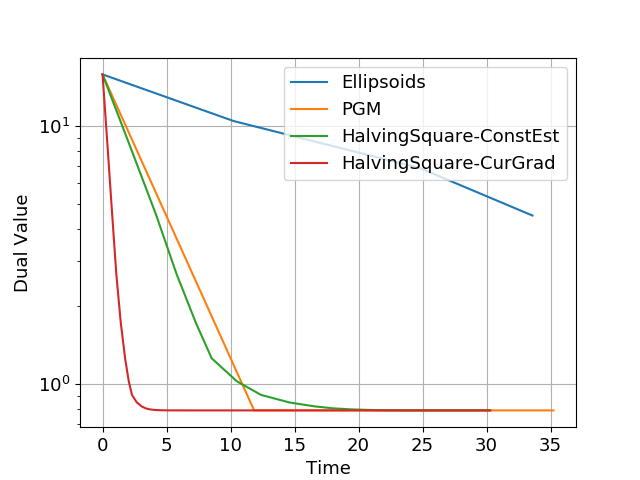

In [6]:
import matplotlib.pyplot as plt
%matplotlib notebook
keys.sort()
for i in keys:
    plt.semilogy(new_dict[i][0], new_dict[i][1])
keys[1] = 'PGM'
plt.grid()
n = 13
plt.xticks(fontsize = n)
plt.yticks(fontsize = n)
plt.legend(keys, fontsize = n)
n = 13
plt.ylabel('Dual Value', fontsize = n)
plt.xlabel('Time', fontsize = n)
plt.show()

###  N = 10, $\epsilon$ = 1e-10

In [10]:
import sys
sys.path.append("./Experiments")
sys.path.append("./Tests_functions")
import matplotlib.pyplot as plt
import comparison
%matplotlib notebook
import time

N = 10
time_max = 30
s=time.time()
results, f = comparison.NEWcomparison_LogSumExp(N, time_max = time_max, eps = 1e-10)
results_copy1 = results, f
time.time()-s

R0 0.2189929347170073
L_f 987.0147361211925
Ellipsoids
CurGrad
ConstEst
GD
<bound method halving_square.CurGrad of <method_functions.halving_square object at 0xa8c4eb8c>> None
<bound method halving_square.ConstEst of <method_functions.halving_square object at 0xa8c4ebec>> 9.085757914953119e-13


46.03741407394409

In [11]:
import matplotlib.pyplot as plt
%matplotlib notebook
keys = list(results.keys())
#keys = ["HalvingSquare-Const", 'Ellipsoids']
new_dict = dict()
for key in keys:
    print(key, len(results[key][3]))
    times = [i - results[key][3][0] for i in results[key][3]]
    f_value = [f.calculate_function(i[0], i[1])+10 for i in results[key][2]]
    new_dict[key] = (times, f_value)

HalvingSquare-CurGrad 96
HalvingSquare-ConstEst 9
Ellipsoids 3
GD 3


<IPython.core.display.Javascript object>


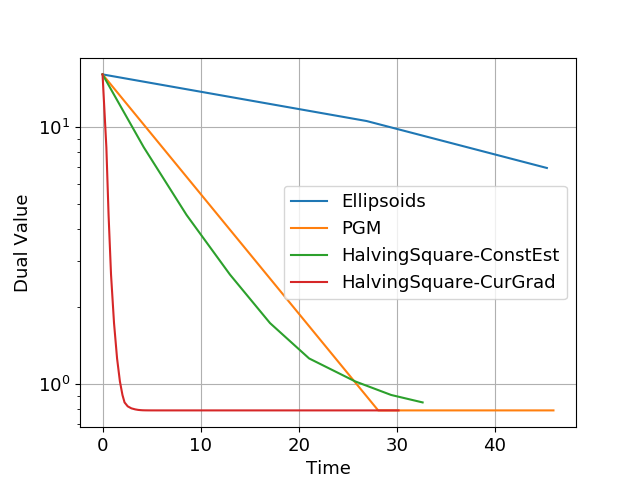

In [12]:
import matplotlib.pyplot as plt
%matplotlib notebook
keys.sort()
for i in keys:
    plt.semilogy(new_dict[i][0], new_dict[i][1])
keys[1] = 'PGM'
plt.grid()
n = 13
plt.xticks(fontsize = n)
plt.yticks(fontsize = n)
plt.legend(keys, fontsize = n)
n = 13
plt.ylabel('Dual Value', fontsize = n)
plt.xlabel('Time', fontsize = n)
plt.show()

### N=100, $\epsilon$ = 0.1

In [8]:
import sys
sys.path.append("./Experiments")
sys.path.append("./Tests_functions")
import matplotlib.pyplot as plt
import comparison
%matplotlib notebook

N = 100
time_max = 200
import time
s = time.time()
results, f = comparison.NEWcomparison_LogSumExp(N, time_max = time_max, eps = 0.1)
results_copy1 = results, f
time.time()-s

R0 0.30381311745351813
L_f 1000.7049387303923
Ellipsoids
CurGrad
ConstEst
GD
<bound method halving_square.ConstEst of <method_functions.halving_square object at 0xa0d6122c>> 8.103948200599423e-05
<bound method halving_square.CurGrad of <method_functions.halving_square object at 0xa0d62fec>> None


228.03024530410767

In [9]:
import matplotlib.pyplot as plt
%matplotlib notebook
keys = list(results.keys())
keys.sort()

#keys = ["HalvingSquare-Const", 'Ellipsoids']
new_dict = dict()
for key in keys:
    print(key, len(results[key][3]))
    times = [i - results[key][3][0] for i in results[key][3]][:100]
    f_value = [f.calculate_function(i[0], i[1]) for i in results[key][2]][:100]
    new_dict[key] = (times, f_value)

Ellipsoids 5
GD 5
HalvingSquare-ConstEst 44
HalvingSquare-CurGrad 52


<IPython.core.display.Javascript object>


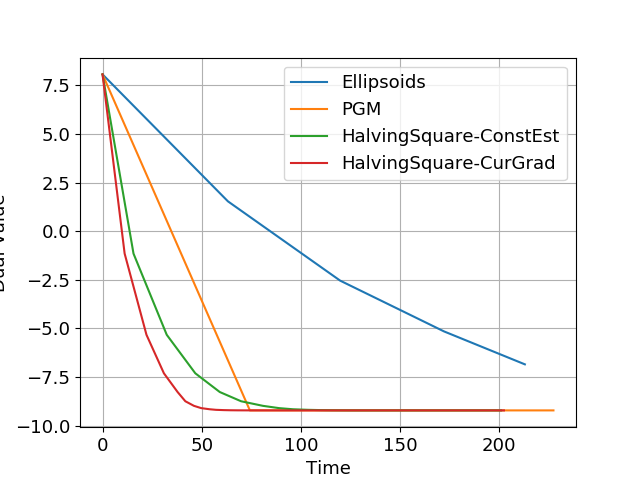

In [10]:
import matplotlib.pyplot as plt
%matplotlib notebook
keys.sort()
for i in keys:
    plt.plot(new_dict[i][0], new_dict[i][1])
keys[1] = 'PGM'

plt.grid()
n = 13
plt.xticks(fontsize = n)
plt.yticks(fontsize = n)
plt.legend(keys, fontsize = n)
plt.ylabel('Dual Value', fontsize = n)
plt.xlabel('Time', fontsize = n)
plt.show()

### N=100, $\epsilon$ = 0.001

In [11]:
import sys
sys.path.append("./Experiments")
sys.path.append("./Tests_functions")
import matplotlib.pyplot as plt
import comparison
%matplotlib notebook

N = 100
time_max = 200
import time
s = time.time()
results, f = comparison.NEWcomparison_LogSumExp(N, time_max = time_max, eps = 0.001)
results_copy1 = results, f
time.time()-s

R0 0.30381311745351813
L_f 998.7851792575697
Ellipsoids
CurGrad
ConstEst
GD
<bound method halving_square.CurGrad of <method_functions.halving_square object at 0xa0927eec>> None
<bound method halving_square.ConstEst of <method_functions.halving_square object at 0xa0927f8c>> 9.393952348165958e-07


226.3013415336609

In [12]:
import matplotlib.pyplot as plt
%matplotlib notebook
keys = list(results.keys())
keys.sort()

#keys = ["HalvingSquare-Const", 'Ellipsoids']
new_dict = dict()
for key in keys:
    print(key, len(results[key][3]))
    times = [i - results[key][3][0] for i in results[key][3]][:100]
    f_value = [f.calculate_function(i[0], i[1]) for i in results[key][2]][:100]
    new_dict[key] = (times, f_value)

Ellipsoids 3
GD 3
HalvingSquare-ConstEst 13
HalvingSquare-CurGrad 44


<IPython.core.display.Javascript object>


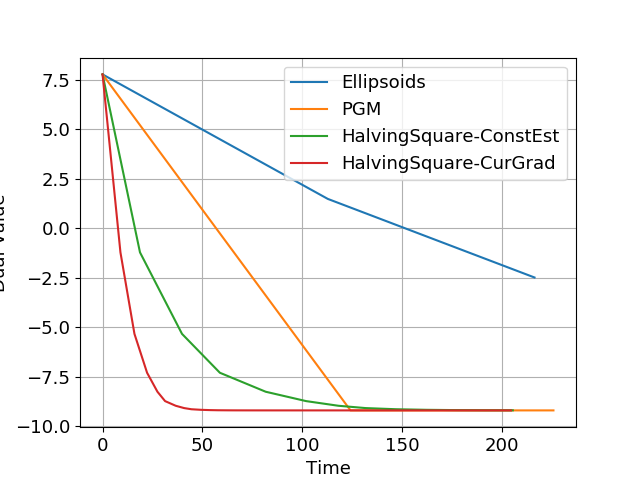

In [13]:
import matplotlib.pyplot as plt
%matplotlib notebook
keys.sort()
for i in keys:
    plt.plot(new_dict[i][0], new_dict[i][1])
keys[1] = 'PGM'

plt.grid()
n = 13
plt.xticks(fontsize = n)
plt.yticks(fontsize = n)
plt.legend(keys, fontsize = n)
plt.ylabel('Dual Value', fontsize = n)
plt.xlabel('Time', fontsize = n)
plt.show()

### N=100, $\epsilon$ = 1e-10

In [14]:
import sys
sys.path.append("./Experiments")
sys.path.append("./Tests_functions")
import matplotlib.pyplot as plt
import comparison
%matplotlib notebook

N = 100
time_max = 200
import time
s = time.time()
results, f = comparison.NEWcomparison_LogSumExp(N, time_max = time_max, eps = 1e-10)
results_copy1 = results, f
time.time()-s

R0 0.30381311745351813
L_f 976.9425628978802
Ellipsoids
CurGrad
ConstEst
GD
<bound method halving_square.CurGrad of <method_functions.halving_square object at 0xa08eec0c>> None
<bound method halving_square.ConstEst of <method_functions.halving_square object at 0xa08eefcc>> 8.546837797600269e-14


247.75395011901855

In [15]:
import matplotlib.pyplot as plt
%matplotlib notebook
keys = list(results.keys())
keys.sort()

#keys = ["HalvingSquare-Const", 'Ellipsoids']
new_dict = dict()
for key in keys:
    print(key, len(results[key][3]))
    times = [i - results[key][3][0] for i in results[key][3]][:100]
    f_value = [f.calculate_function(i[0], i[1]) for i in results[key][2]][:100]
    new_dict[key] = (times, f_value)

Ellipsoids 2
GD 2
HalvingSquare-ConstEst 7
HalvingSquare-CurGrad 53


<IPython.core.display.Javascript object>


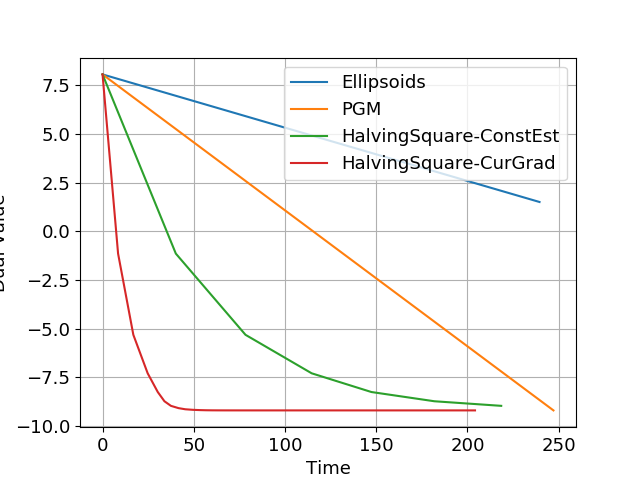

In [16]:
import matplotlib.pyplot as plt
%matplotlib notebook
keys.sort()
for i in keys:
    plt.plot(new_dict[i][0], new_dict[i][1])
keys[1] = 'PGM'

plt.grid()
n = 13
plt.xticks(fontsize = n)
plt.yticks(fontsize = n)
plt.legend(keys, fontsize = n)
plt.ylabel('Dual Value', fontsize = n)
plt.xlabel('Time', fontsize = n)
plt.show()